# Data Preprocessing

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'../crawldata/raw_data.csv')


## Tiền xử lý

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874 entries, 0 to 873
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             874 non-null    object 
 1   Price sale        873 non-null    float64
 2   Price origin      873 non-null    float64
 3   CPU               846 non-null    object 
 4   Ram               872 non-null    float64
 5   Storage           870 non-null    float64
 6   Operating system  874 non-null    object 
 7   Brand             874 non-null    object 
 8   Screen size       872 non-null    float64
dtypes: float64(5), object(4)
memory usage: 61.6+ KB


In [3]:

df = df.dropna()
df.to_csv('../clean data/clean_data.csv', index=False)


In [4]:
df_filtered = df.query("Brand == 'cao' or Brand == 'mỏng'")
print(df_filtered)

                                           Title  Price sale  Price origin  \
733  Laptop mỏng nhẹ LENOVO Thinkbook 14S G2 ITL  15990000.0    18990000.0   
739   Laptop cao cấp Lenovo ThinkBook 16 G4+ IAP  24990000.0    31990000.0   

             CPU  Ram  Storage Operating system Brand  Screen size  
733  20VA003NVN)  8.0    256.0       Windows 11  mỏng         15.0  
739  21CY003JVN)  8.0    256.0       Windows 11   cao         15.0  


In [5]:
df['Brand'] = df['Brand'].replace({'cao': 'Lenovo', 'mỏng': 'Lenovo'})
df['Brand'] = df['Brand'].str.lower()

df.to_csv(r'../clean data/clean_data.csv', index=False)

### lọc dữ liệu CPU

In [6]:
import pandas as pd
import re
keywords = ['ryzen 5','ryzen 7', 'ultra 9','ultra 7','Ultra 5', 'm3', 'm3 max', 'm3 pro', 'm1', 'm2', 'i9', 'i3', 'i5', 'i7']
df['CPU'] = df['CPU'].str.lower()
def filter_keywords(text):
    for keyword in keywords:
        if keyword in text:
            return keyword
    return None

df['CPU'] = df['CPU'].apply(filter_keywords)
df = df.dropna()
df.to_csv(r'../clean data/clean_data.csv', index=False)


In [7]:
df['Price sale'] = df['Price sale'].abs()

df['Price origin'] = df['Price origin'].abs()

df['discount'] = df['Price origin'] - df['Price sale']

df = df.drop(columns='Price origin')

df.to_csv(r'../clean data/clean_data.csv', index=False)

so sánh sự khác nhau

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 732 entries, 0 to 873
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             732 non-null    object 
 1   Price sale        732 non-null    float64
 2   CPU               732 non-null    object 
 3   Ram               732 non-null    float64
 4   Storage           732 non-null    float64
 5   Operating system  732 non-null    object 
 6   Brand             732 non-null    object 
 7   Screen size       732 non-null    float64
 8   discount          732 non-null    float64
dtypes: float64(5), object(4)
memory usage: 57.2+ KB


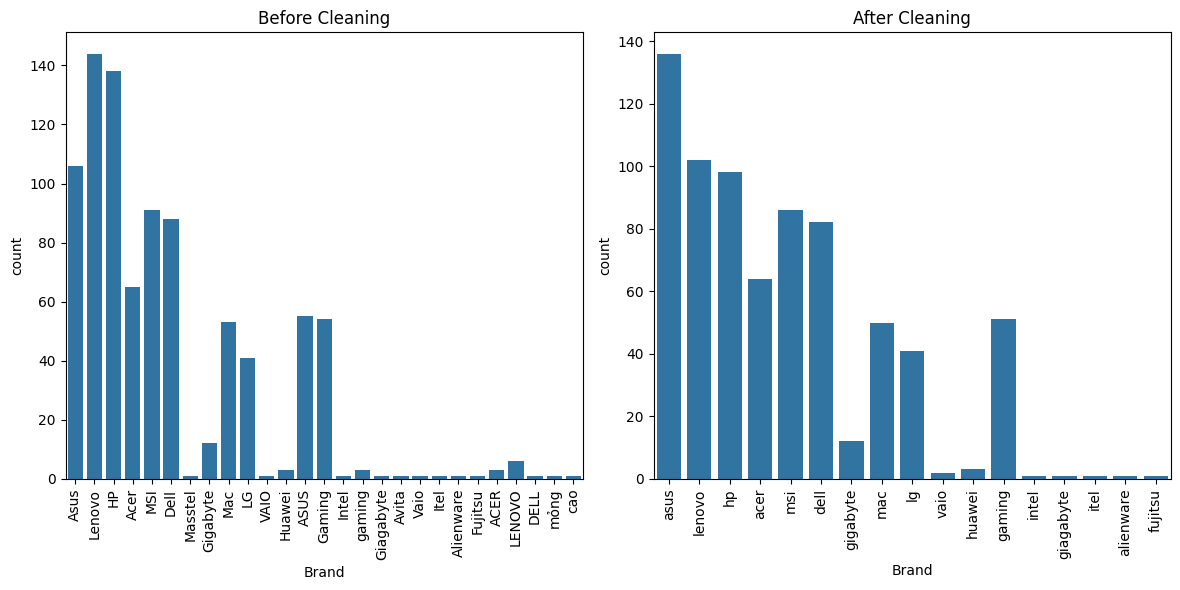

Top 5 giá trị của cột 'Brand' trước khi làm sạch:
Brand
Lenovo    144
HP        138
Asus      106
MSI        91
Dell       88
Name: count, dtype: int64

Top 5 giá trị của cột 'Brand' sau khi làm sạch:
Brand
asus      136
lenovo    102
hp         98
msi        86
dell       82
Name: count, dtype: int64


In [9]:


df_clean_data = pd.read_csv(r'../clean data/clean_data.csv')

df_crawl_data = pd.read_csv(r'../crawldata/raw_data.csv')


# Tạo biểu đồ đếm số lượng mẫu cho mỗi giá trị trong cột 'Brand' trước và sau khi làm sạch
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Brand', data=df_crawl_data)
plt.title('Before Cleaning')

plt.xticks(rotation=90)
plt.subplot(1, 2, 2)
sns.countplot(x='Brand', data=df_clean_data)
plt.title('After Cleaning')
plt.tight_layout()

plt.xticks(rotation=90)
plt.show()

top_brand_before_cleaning = df_crawl_data['Brand'].value_counts().head(5)
top_brand_after_cleaning = df_clean_data['Brand'].value_counts().head(5)

print("Top 5 giá trị của cột 'Brand' trước khi làm sạch:")
print(top_brand_before_cleaning)
print("\nTop 5 giá trị của cột 'Brand' sau khi làm sạch:")
print(top_brand_after_cleaning)

C:\Users\OS\AppData\Local\Temp\ipykernel_22804\153221483.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


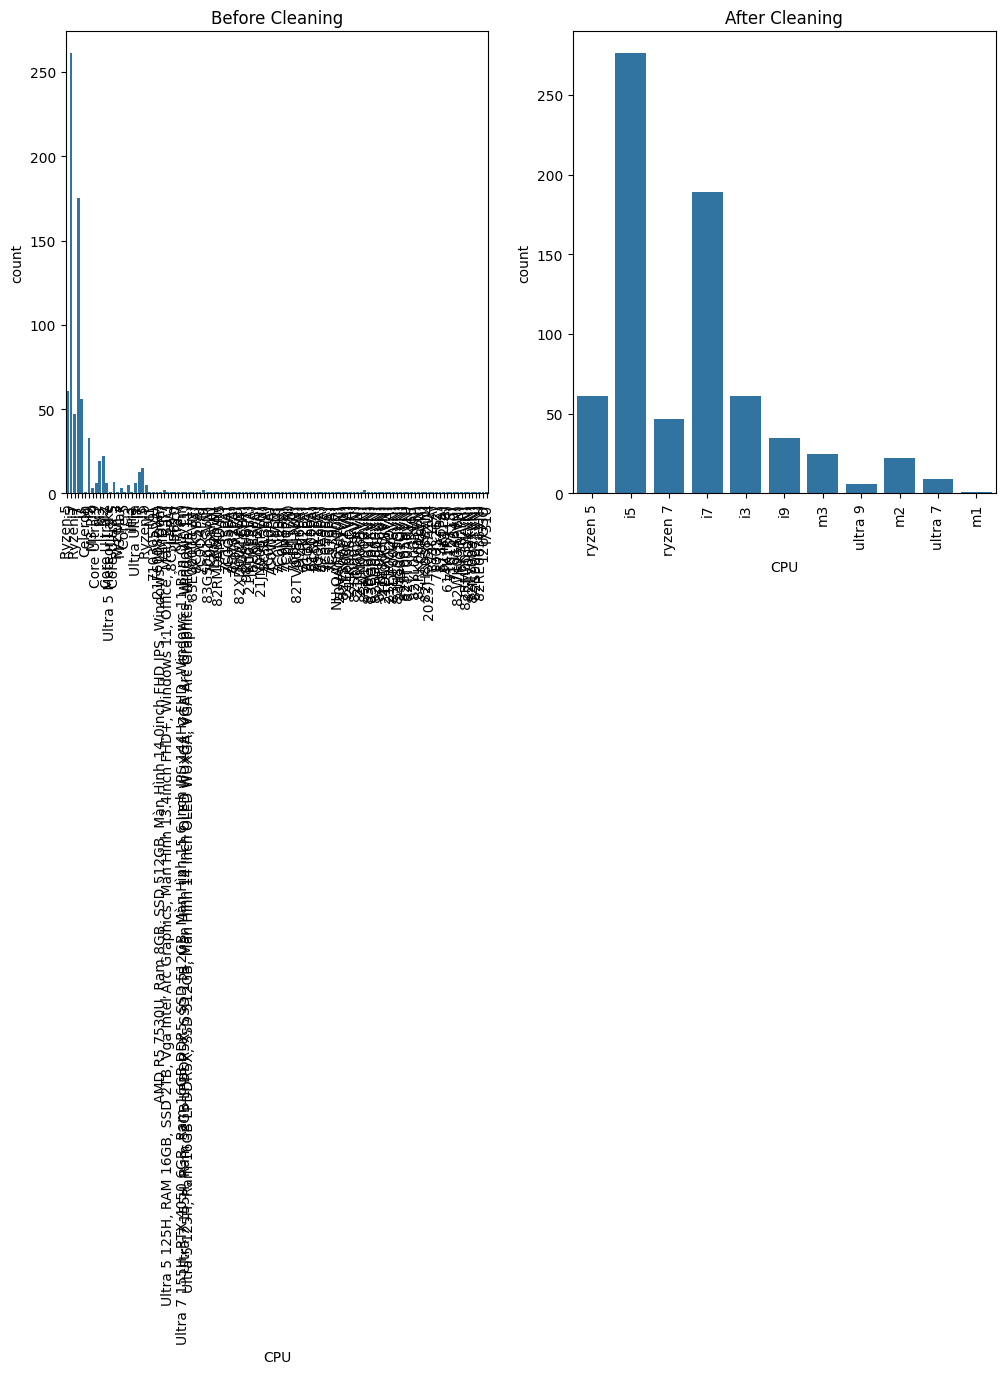

Top 5 giá trị của cột 'CPU' trước khi làm sạch:
CPU
i5         261
i7         175
Ryzen 5     61
i3          56
Ryzen 7     47
Name: count, dtype: int64

Top 5 giá trị của cột 'CPU' sau khi làm sạch:
CPU
i5         276
i7         189
ryzen 5     61
i3          61
ryzen 7     47
Name: count, dtype: int64


In [10]:

# Tạo biểu đồ đếm số lượng mẫu cho mỗi giá trị trong cột 'CPU' trước và sau khi làm sạch
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='CPU', data=df_crawl_data)
plt.title('Before Cleaning')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.countplot(x='CPU', data=df_clean_data)
plt.title('After Cleaning')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# In ra top 5 giá trị của cột 'CPU' trước và sau khi làm sạch
top_cpu_before_cleaning = df_crawl_data['CPU'].value_counts().head(5)
top_cpu_after_cleaning = df_clean_data['CPU'].value_counts().head(5)

print("Top 5 giá trị của cột 'CPU' trước khi làm sạch:")
print(top_cpu_before_cleaning)
print("\nTop 5 giá trị của cột 'CPU' sau khi làm sạch:")
print(top_cpu_after_cleaning)

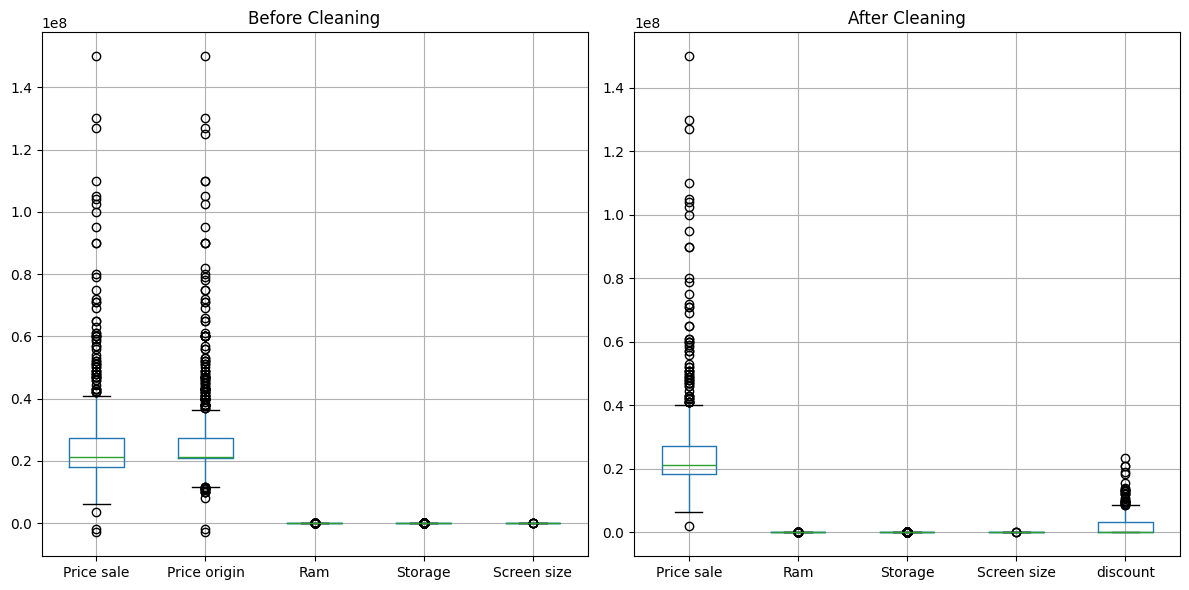

In [11]:

plt.figure(figsize=(12, 6))

# Vẽ biểu đồ boxplot cho DataFrame trước và sau khi làm sạch
plt.subplot(1, 2, 1)
df_crawl_data.boxplot()
plt.title('Before Cleaning')

plt.subplot(1, 2, 2)
df_clean_data.boxplot()
plt.title('After Cleaning')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

## Mã hóa và chuẩn hóa dữ liệu

In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_clean_data['Operating system'] = label_encoder.fit_transform(df_clean_data['Operating system'])
df_clean_data['CPU'] = label_encoder.fit_transform(df_clean_data['CPU'])
df_clean_data['Brand'] = label_encoder.fit_transform(df_clean_data['Brand'])
df_clean_data.head()

,Title,Price sale,CPU,Ram,Storage,Operating system,Brand,Screen size,discount
0,Laptop Asus Vivobook E1404FA-NK186W R5 7520U/1...,12290000.0,7,16.0,512.0,1,2,14.0,2700000.0
1,Laptop Lenovo Gaming LOQ - 15IAX9 i5 12450HX/A...,18490000.0,1,16.0,512.0,1,12,15.6,3000000.0
2,Laptop HP 14s-em0086AU R5 7520U/16GB/512GB/14'...,13490000.0,7,16.0,512.0,1,8,14.0,1700000.0
3,Laptop Acer Aspire 3 A315-44P-R5QG R7 5700U/16...,12490000.0,8,16.0,512.0,1,0,15.6,2500000.0
4,Laptop HP Pavilion Aero 13-be2098AU R7 7735U/1...,19490000.0,8,16.0,512.0,1,8,13.3,2500000.0


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_clean_data[['Price sale', 'discount', 'CPU', 'Ram', 'Storage', 'Screen size','Brand','Operating system' ]] = scaler.fit_transform(df_clean_data[['Price sale', 'discount', 'CPU', 'Ram', 'Storage', 'Screen size','Brand','Operating system' ]])

df_clean_data.head()


,Title,Price sale,CPU,Ram,Storage,Operating system,Brand,Screen size,discount
0,Laptop Asus Vivobook E1404FA-NK186W R5 7520U/1...,0.069532,0.7,0.011765,0.098592,1.0,0.125,0.557522,0.114894
1,Laptop Lenovo Gaming LOQ - 15IAX9 i5 12450HX/A...,0.111426,0.1,0.011765,0.098592,1.0,0.750,0.628319,0.127660
2,Laptop HP 14s-em0086AU R5 7520U/16GB/512GB/14'...,0.077640,0.7,0.011765,0.098592,1.0,0.500,0.557522,0.072340
3,Laptop Acer Aspire 3 A315-44P-R5QG R7 5700U/16...,0.070883,0.8,0.011765,0.098592,1.0,0.000,0.628319,0.106383
4,Laptop HP Pavilion Aero 13-be2098AU R7 7735U/1...,0.118184,0.8,0.011765,0.098592,1.0,0.500,0.526549,0.106383


In [14]:

df_clean_data.to_csv(r'../model/data.csv',  index=False)